In [73]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt 
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import warnings
warnings.simplefilter(action="ignore")

from lazypredict.Supervised import LazyClassifier, LazyRegressor
from tpot import TPOTClassifier

In [74]:
df = pd.read_csv('data/data.csv')

In [75]:
# Outliers removal

def outliers_removal(feature,feature_name,dataset):
    
    # Identify 25th & 75th quartiles

    q25, q75 = np.percentile(feature, 25), np.percentile(feature, 75)
    feat_iqr = q75 - q25
    
    
    feat_cut_off = feat_iqr * 1.5
    feat_lower, feat_upper = q25 - feat_cut_off, q75 + feat_cut_off
   
    outliers = [x for x in feature if x < feat_lower or x > feat_upper]
   

    dataset = dataset.drop(dataset[(dataset[feature_name] > feat_upper) | (dataset[feature_name] < feat_lower)].index)
 
    
    return dataset

for col in df:
    new_df = outliers_removal(df[col],str(col),df)

In [76]:
X = new_df.drop(['Bankrupt?'], axis = 1)


In [47]:
# sc = StandardScaler()
# mms = MinMaxScaler()
# rs= RobustScaler()

In [55]:
# X = mms.fit_transform(X)

In [77]:
y =new_df['Bankrupt?']


In [78]:
#from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test  = train_test_split(X, y,
                                              test_size=0.3,
                                              random_state = 42)

In [79]:
y_train

1165    0
5516    0
2732    0
6241    0
6498    1
       ..
4156    0
5653    0
5688    0
5864    0
896     0
Name: Bankrupt?, Length: 4389, dtype: int64

In [80]:
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

# Model RandomForestClassifier

In [240]:
model = RandomForestClassifier()

In [243]:
params = { 'max_leaf_nodes': [100, 150, 200], 'min_samples_split' : [5,10,15], 'n_estimators': [400, 500, 600,700, 800], }

In [244]:
grid_search = GridSearchCV(estimator=model,
                           param_grid=params,
                           scoring='recall',
                           cv=3,
                           n_jobs=-1)

In [245]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_leaf_nodes': [100, 150, 200],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [400, 500, 600, 700, 800]},
             scoring='recall')

In [246]:
best_estimator = grid_search.best_estimator_

In [247]:
best_estimator

RandomForestClassifier(max_leaf_nodes=200, min_samples_split=5,
                       n_estimators=500)

In [ ]:
max_leaf_nodes=100, min_samples_split=2,n_estimators=400

In [205]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [251]:
rf = RandomForestClassifier(max_leaf_nodes=100, min_samples_split=2,n_estimators=400)
rf.fit(X_train, y_train)

prediction = rf.predict(X_test)

[0.        0.0504386 1.       ] [0.         0.66666667 1.        ]
80.81140350877193


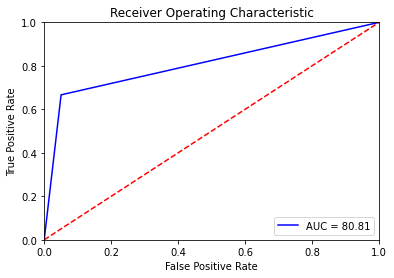

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1824
           1       0.29      0.67      0.41        57

    accuracy                           0.94      1881
   macro avg       0.64      0.81      0.69      1881
weighted avg       0.97      0.94      0.95      1881



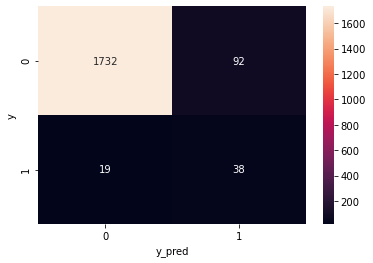

f1_score is:  40.64171122994652


In [252]:
from sklearn.metrics import roc_curve,auc
fp, tp, thresholds=roc_curve(y_test,prediction,pos_label=1)
print(fp, tp)
AUC=auc(fp, tp)*100
print(AUC)

#tracer tp en fonction de fp
import matplotlib.pyplot as plt
plt.plot(fp, tp, color='blue',label = 'AUC = %0.2f' % AUC)
plt.title('Receiver Operating Characteristic')
#plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUC)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

from sklearn.metrics import classification_report
Class=classification_report(y_test,prediction)
print(Class)

def plot_confusion_matrix(y, prediction):
     cm = confusion_matrix(y, prediction)
     sns.heatmap(cm, annot=True, fmt=".0f")
     plt.xlabel('y_pred')
     plt.ylabel('y')
     plt.show()

plot_confusion_matrix(y_test, prediction)

from sklearn.metrics import f1_score
f1score=f1_score(y_test,prediction)*100
print('f1_score is: ',f1score)

# Logistic regression

0.8952684742158427
[0.         0.09868421 1.        ] [0.         0.70175439 1.        ]
80.15350877192982


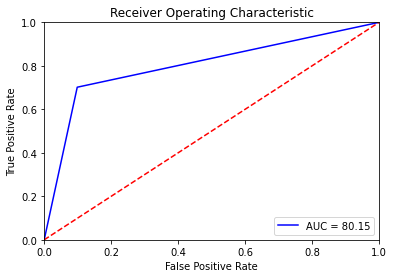

              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1824
           1       0.18      0.70      0.29        57

    accuracy                           0.90      1881
   macro avg       0.59      0.80      0.62      1881
weighted avg       0.97      0.90      0.92      1881



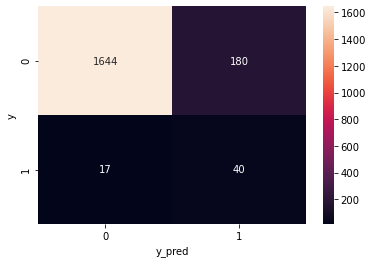

In [250]:
 from sklearn.linear_model import LogisticRegression
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print(pipe.score(X_test, y_test))

from sklearn.metrics import roc_curve,auc
fp, tp, thresholds=roc_curve(y_test,y_pred,pos_label=1)
print(fp, tp)
AUC=auc(fp, tp)*100
print(AUC)

#tracer tp en fonction de fp
import matplotlib.pyplot as plt
plt.plot(fp, tp, color='blue',label = 'AUC = %0.2f' % AUC)
plt.title('Receiver Operating Characteristic')
#plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUC)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

from sklearn.metrics import classification_report
Class=classification_report(y_test,y_pred)
print(Class)

def plot_confusion_matrix(y, y_pred):
     cm = confusion_matrix(y, y_pred)
     sns.heatmap(cm, annot=True, fmt=".0f")
     plt.xlabel('y_pred')
     plt.ylabel('y')
     plt.show()

plot_confusion_matrix(y_test, y_pred)



# TPOT 

In [81]:
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, n_jobs=1)

In [ ]:
tpot.fit(X_train, y_train)

In [ ]:
tpot.export('bankrupt_pipeline2.py')

In [59]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv('data/data.csv', sep=',', dtype=np.float64)
X = tpot_data.drop('Bankrupt?', axis=1)
y = tpot_data['Bankrupt?']
X_train, X_test, y_train, y_test = \
            train_test_split(X, y, random_state=None)

sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

# Average CV score on the training set was: 0.9696960802902836
exported_pipeline = make_pipeline(
    MinMaxScaler(),
    XGBClassifier(learning_rate=0.1, max_depth=9, min_child_weight=1, n_estimators=100, n_jobs=1, subsample=0.9000000000000001, verbosity=0)
)

exported_pipeline.fit(X_train, y_train)
y_pred = exported_pipeline.predict(X_test)


[0.         0.03085299 1.        ] [0.  0.5 1. ]
73.4573502722323


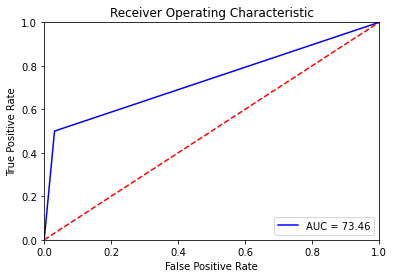

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98      1653
         1.0       0.34      0.50      0.40        52

    accuracy                           0.95      1705
   macro avg       0.66      0.73      0.69      1705
weighted avg       0.96      0.95      0.96      1705



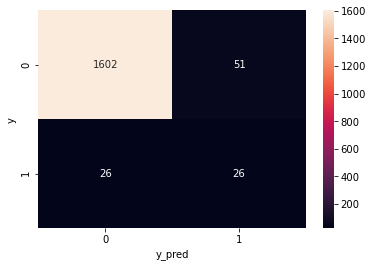

In [60]:
from sklearn.metrics import roc_curve,auc
fp, tp, thresholds=roc_curve(y_test,y_pred,pos_label=1)
print(fp, tp)
AUC=auc(fp, tp)*100
print(AUC)

#tracer tp en fonction de fp
import matplotlib.pyplot as plt
plt.plot(fp, tp, color='blue',label = 'AUC = %0.2f' % AUC)
plt.title('Receiver Operating Characteristic')
#plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUC)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

from sklearn.metrics import classification_report
Class=classification_report(y_test,y_pred)
print(Class)

def plot_confusion_matrix(y, y_pred):
     cm = confusion_matrix(y, y_pred)
     sns.heatmap(cm, annot=True, fmt=".0f")
     plt.xlabel('y_pred')
     plt.ylabel('y')
     plt.show()

plot_confusion_matrix(y_test, y_pred)

